In [1]:
!pip install qiskit
!pip install qiskit qiskit-aer
!pip install pylatexenc


[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: C:\Users\cvars\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: C:\Users\cvars\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: C:\Users\cvars\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
# Import libraries
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

In [3]:
# Step 1: Create a quantum circuit with 2 qubits and 2 classical bits
qc = QuantumCircuit(2, 2)

In [4]:
# Step 2: Apply gates to demonstrate tensor product states
qc.x(0)  # Apply X gate on qubit 0 → |10>

In [5]:
# Step 3: Measure both qubits
qc.measure([0, 1], [0, 1])

In [6]:
# Step 4: Use AerSimulator (new standard in Qiskit 2.x)
simulator = AerSimulator()

# Transpile the circuit for the simulator
from qiskit import transpile
compiled_circuit = transpile(qc, simulator)

# Run the circuit
job = simulator.run(compiled_circuit, shots=1024)
result = job.result()

# Get counts
counts = result.get_counts()

In [7]:
# Step 5: Display circuit and results
print("Measurement Results:", counts)
qc.draw('text')
plt.show()
plot_histogram(counts)
plt.show()

Measurement Results: {'01': 1024}


**TASK-1**  Change Gate Combination

Apply a Hadamard gate on both qubits and observe the output probabilities.
What pattern do you notice in the histogram?

In [8]:
# --- TASK 1: HADAMARD ON BOTH QUBITS ---

from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt
from IPython.display import display

simulator = AerSimulator()


In [9]:
# Create 2-qubit, 2-classical-bit circuit
qc = QuantumCircuit(2, 2)

# Apply Hadamard on both qubits
qc.h(0)
qc.h(1)

# Measure both qubits
qc.measure([0, 1], [0, 1])

In [10]:
# Compile and run
compiled_circuit = transpile(qc, simulator)
job = simulator.run(compiled_circuit, shots=1024)
result = job.result()
counts = result.get_counts()

Measurement Results: {'00': 259, '10': 246, '01': 264, '11': 255}


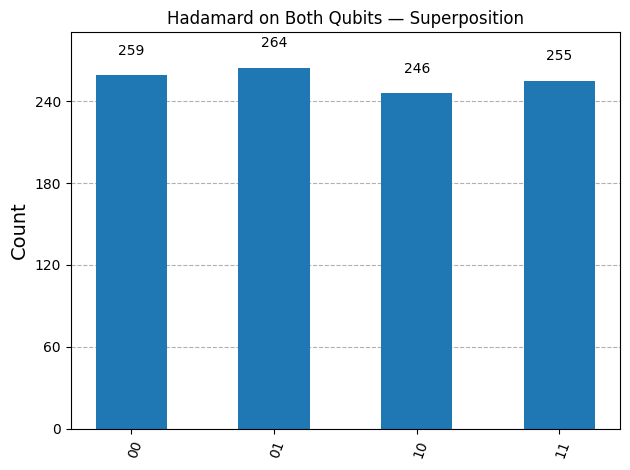

In [11]:
# Display results
print("Measurement Results:", counts)
display(plot_histogram(counts, title="Hadamard on Both Qubits — Superposition")) # Fixed the invalid character in title
plt.show()

**OBSERVATION:** Each bar should be roughly equal height, close to 25% each (though small variations happen due to randomness).

It’s a uniform distribution — every possible measurement result is equally likely.

**TASK-2** Swap Qubit Roles

Apply an X gate on the second qubit instead of the first.
Compare the output with the original circuit.

In [12]:
# --- TASK 2 ---

from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt
from IPython.display import display

simulator = AerSimulator()

In [13]:
# Create 2-qubit, 2-classical-bit circuit
qc = QuantumCircuit(2, 2)

# Apply x gate on second qubit

qc.x(1)

# Measure both qubits
qc.measure([0, 1], [0, 1])

In [14]:
# Compile and run
compiled_circuit = transpile(qc, simulator)
job = simulator.run(compiled_circuit, shots=1024)
result = job.result()
counts = result.get_counts()

Measurement Results: {'10': 1024}


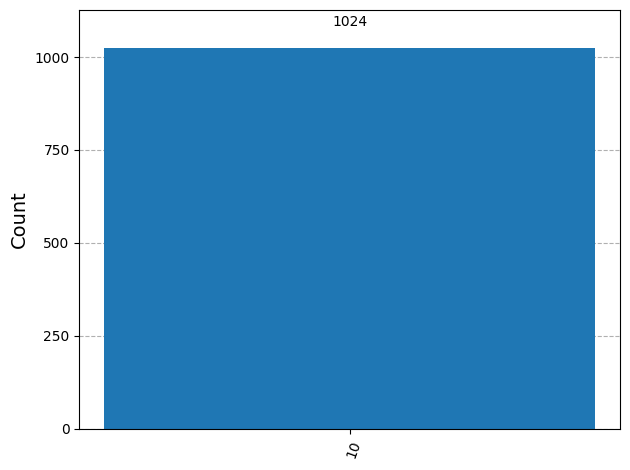

In [15]:
# Display results
print("Measurement Results:", counts)
display(plot_histogram(counts)) # Fixed the invalid character in title
plt.show()

**OBSERVATION**  I applied qc.x(1) and measured each qubit separately. Measuring qubit 1 alone yields 1, while measuring qubit 0 alone yields 0. This confirms that x(1) flips the second qubit.

**TASK-3**
Add a CNOT Gate

Add qc.cx(0, 1) after the Hadamard gate.
What kind of state does this create? (Hint: entanglement)

In [16]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt
from IPython.display import display

simulator = AerSimulator()


In [17]:
# Create 2-qubit, 2-classical-bit circuit
qc = QuantumCircuit(2, 2)

#Apply cnot gate
qc.h(0)
qc.cx(0, 1)

# Measure both qubits
qc.measure([0, 1], [0, 1])

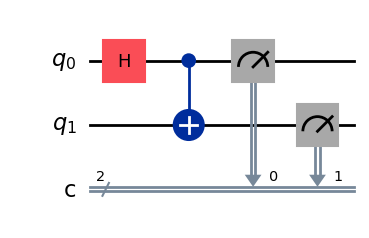

In [18]:
display(qc.draw('mpl'))

In [19]:
# Compile and run
compiled_circuit = transpile(qc, simulator)
job = simulator.run(compiled_circuit, shots=1024)
result = job.result()
counts = result.get_counts()

Measurement Results: {'11': 517, '00': 507}


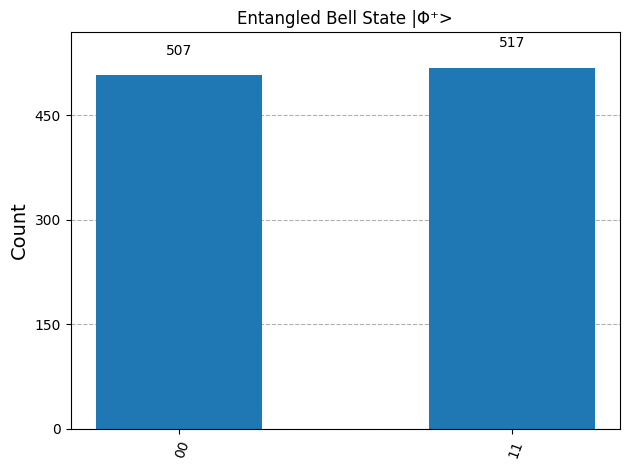

In [20]:
# Step 3: Show results
print("Measurement Results:", counts)
display(plot_histogram(counts, title="Entangled Bell State |Φ⁺>"))
plt.show()

Quantum State (|00>, |01>, |10>, |11>): [0.70710678+0.j 0.        +0.j 0.        +0.j 0.70710678+0.j]


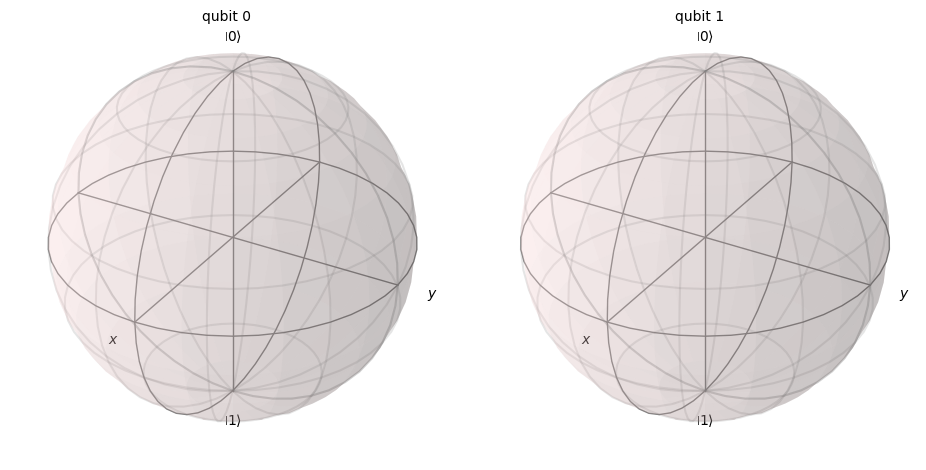

In [21]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector
import matplotlib.pyplot as plt

# Step 4: View state before measurement
qc_state = QuantumCircuit(2)
qc_state.h(0)
qc_state.cx(0, 1)

# Generate the statevector from the circuit
state = Statevector.from_instruction(qc_state)

# Print the quantum state amplitudes
print("Quantum State (|00>, |01>, |10>, |11>):", state.data)

# Display the Bloch sphere representation
display(plot_bloch_multivector(state))
plt.show()


**OBSERVATION**  After applying the Hadamard gate on the first qubit and the CNOT gate with that qubit as control, the circuit produces an entangled Bell state |Φ⁺⟩ = ( |00⟩ + |11⟩ )/√2.
The measurement histogram shows outcomes only for 00 and 11 with nearly equal probability, confirming perfect correlation between the two qubits.

**TASK 4**  Increase Measurement Shots

Change the number of shots from 1024 to 4096 in the execute() function.
Does the distribution become more stable?

In [22]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

# Initialize simulator
simulator = AerSimulator()

In [23]:
# Create a 2-qubit, 2-classical-bit circuit
qc = QuantumCircuit(2, 2)

# Apply Hadamard gate on the first qubit
qc.h(0)

# Add CNOT gate (control = qubit 0, target = qubit 1)
qc.cx(0, 1)

In [24]:
# Measure both qubits
qc.measure([0, 1], [0, 1])

In [25]:
# Compile and run circuit with 4096 shots
compiled_circuit = transpile(qc, simulator)
job = simulator.run(compiled_circuit, shots=4096)
result = job.result()
counts = result.get_counts()

Measurement Results: {'11': 2095, '00': 2001}


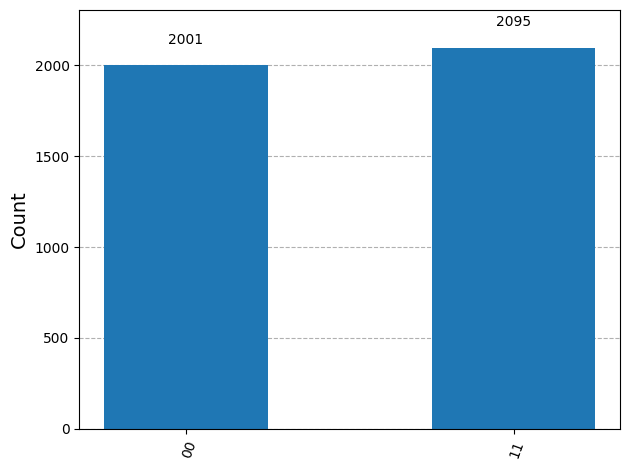

In [26]:
# Display results
# Display results
print("Measurement Results:", counts)
display(plot_histogram(counts)) # Fixed the invalid character in title
plt.show()

**OBSERVATION**  When the number of shots increases to 4096, the random fluctuations seen at 1024 shots smooth out. The output stabilizes with two bars of nearly equal height at 00 and 11, confirming the Bell entangled state (superposition of both qubits being 0 or both being 1).

**TASK 5** Add a New Visualization

Use plot_bloch_multivector to visualize the combined state of both qubits.
Observe how the Bloch sphere changes before and after measurement.

In [27]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from qiskit.quantum_info import Statevector
import matplotlib.pyplot as plt

# Step 1: Create 2-qubit, 2-classical-bit circuit
qc = QuantumCircuit(2, 2)

# Step 2: Apply Hadamard and CNOT (creates entanglement)
qc.h(0)
qc.cx(0, 1)

In [28]:
# Create a 2-qubit, 2-classical-bit circuit
qc = QuantumCircuit(2, 2)

# Apply Hadamard gate on the first qubit
qc.h(0)

# Add CNOT gate (control = qubit 0, target = qubit 1)
qc.cx(0, 1)

In [29]:
# Step 3: Get statevector BEFORE measurement
qc_state = QuantumCircuit(2) # Create a new circuit without measurements for statevector
qc_state.h(0); qc_state.cx(0, 1) # Apply the same gates as qc

state = Statevector.from_instruction(qc_state)

# Step 4: Force render Bloch sphere as a static image
bloch_fig = plot_bloch_multivector(state)

In [30]:
# Create a 2-qubit, 2-classical-bit circuit with measurements for simulation
qc = QuantumCircuit(2, 2)

# Apply Hadamard gate on the first qubit
qc.h(0)

# Add CNOT gate (control = qubit 0, target = qubit 1)
qc.cx(0, 1)

# Measure both qubits
qc.measure([0, 1], [0, 1])

# Compile and run
compiled_circuit = transpile(qc, simulator)
job = simulator.run(compiled_circuit, shots=1024)
result = job.result()
counts = result.get_counts()

Measurement Results: {'11': 486, '00': 538}


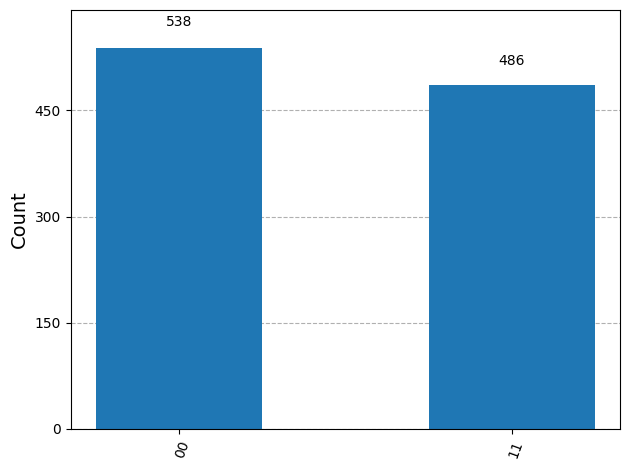

In [31]:
# Display results
# Display results
print("Measurement Results:", counts)
display(plot_histogram(counts))
plt.show()

**OBSERVATION**  Before measurement, the Bloch sphere visualizes quantum correlation (entanglement).
After measurement, the qubits behave classically, always matching values (either both 0 or both 1).